run time 7.268056238999634 seconds


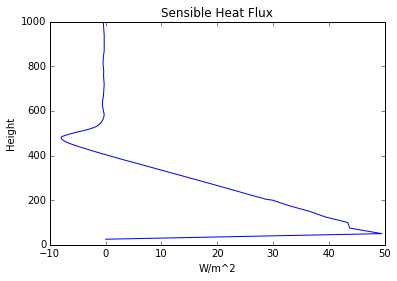

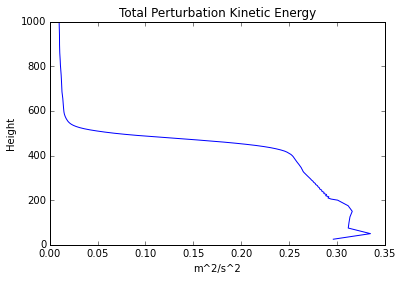

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 22 15:18:44 2015

Calculates & plots the heat flux & tke for the first km

@author: wesley
"""


from netCDF4 import Dataset
from matplotlib import pyplot as plt
% matplotlib inline
import numpy as np
import urllib.request
import os
import timeit


start = timeit.default_timer()

Rd = 287
cp = 1004

root='http://clouds.eos.ubc.ca/~phil/docs/atsc500/dryles'
Data_Dir=os.getcwd()+'/data_lec4/'
if not os.path.exists(Data_Dir):
    os.makedirs(Data_Dir)
    for i in np.arange(1,11,dtype=np.int):
        the_name='mar12014_{:d}_15600.nc'.format(i)
        url='{}/{}'.format(root,the_name)
        Data=os.path.join(Data_Dir,the_name)
        urllib.request.urlretrieve(url,Data)
cnt = 0.0
for the_name in os.listdir(Data_Dir):
    cnt = cnt + 1.0
    file = Data_Dir+the_name
    with Dataset(Data_Dir+the_name,'r') as nc_in:
        T=nc_in.variables['TABS'][...]
        T=T.squeeze()
        P=nc_in.variables['p'][...]*100
        P=P.squeeze()
        Z=nc_in.variables['z'][...]
        Z=Z.squeeze()
        W=nc_in.variables['W'][...]
        W=W.squeeze()
        U=nc_in.variables['U'][...]
        U=U.squeeze()
        V=nc_in.variables['V'][...]
        V=V.squeeze()
        if cnt == 1.0:
            HF_av=np.zeros(shape=(W.shape))
            W_prime2_av=np.zeros(shape=(W.shape))
            V_prime2_av=np.zeros(shape=(W.shape))
            U_prime2_av=np.zeros(shape=(W.shape))
#
#       Mean Values
#        
        T_bar=T.mean(axis=2).mean(axis=1)
        W_bar=W.mean(axis=2).mean(axis=1)
        V_bar=V.mean(axis=2).mean(axis=1)
        U_bar=U.mean(axis=2).mean(axis=1)
#        
#       Primes
#       
        T_prime=T-T_bar[:,np.newaxis,np.newaxis]
        W_prime=W-W_bar[:,np.newaxis,np.newaxis]
        W_prime2=W_prime**2
        W_prime2_av+=W_prime2
        V_prime2=(V-V_bar[:,np.newaxis,np.newaxis])**2
        V_prime2_av+=V_prime2
        U_prime2=(U-U_bar[:,np.newaxis,np.newaxis])**2
        U_prime2_av+=U_prime2
#        
#       Heat Flux
#        
        HF=T_prime*W_prime
        density = P/(Rd*T_bar)
        HF = density[:,np.newaxis,np.newaxis]*cp*HF
        HF_av += HF
#
#       Calc & Plot ensemble averaged sensible heat flux
#        
HF_av=(HF_av/cnt).mean(axis=2).mean(axis=1)
pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(HF_av,Z)
ax1.set(ylim=(0,1000),xlabel='W/m^2',ylabel='Height',title='Sensible Heat Flux')
#
#       Cacl & Plot TKE       
#
W_prime2_bar=(W_prime2_av/cnt).mean(axis=2).mean(axis=1)
V_prime2_bar=(V_prime2_av/cnt).mean(axis=2).mean(axis=1)
U_prime2_bar=(U_prime2_av/cnt).mean(axis=2).mean(axis=1)
TKE=.5*(U_prime2_bar+V_prime2_bar+W_prime2_bar)
pl = plt.figure(2)
ax2 = pl.add_subplot(1,1,1)
ax2.plot(TKE,Z)
ax2.set(ylim=(0,1000),xlabel='m^2/s^2',ylabel='Height',title='Total Perturbation Kinetic Energy')


stop = timeit.default_timer()
print ('run time', stop-start, 'seconds')